# Import Packages

In [1]:
import Hypergraph
import simulation
import matplotlib.pyplot as plt
#import networkx as nx
import time
import numpy as np

# Set Up the Hypergraph
* Specify the number of nodes
* Specify the hyperdegree distribution
* Generates a configuration model of the hypergraph

In [2]:

n = 1000
parameters = [{"degree-distribution":"power-law","min-degree":10,"max-degree":1000,"hyperedge-size":2,"size":n,"is-correlated":True,"exponent":3},{"degree-distribution":"power-law","min-degree":10,"max-degree":1000,"hyperedge-size":3,"size":n,"is-correlated":True,"exponent":3}]

h = Hypergraph.HypergraphGenerator(parameters)
G = Hypergraph.Hypergraph(h.getHyperedges())

# Epidemic Simulations

## Epidemic Parameters
* Initial size is the number of initial infected nodes
* $\gamma$ is the healing rate of a node
* $\mathbf{\beta}$ is the infection rate for each hyperedge size (keys are the hyperedge size and the value is the infection rate)

In [3]:
initial_size = 10
gamma = 0.5
tau = {2:0.25,3:0.5}

## Run an SIR simulation on hypergraphs
* First simulation is is with discrete time steps (DTMC)
* Second simulation is the Gillespie algorithm (CTMC)

In [12]:
t1, S1, I1, R1 = simulation.discrete_SIR(G, tau, gamma, tmin=0, tmax=10, dt=0.01, initial_infecteds = range(initial_size))
t, S2, I2, R2 = simulation.Gillespie_SIR(G, tau, gamma, tmin=0, tmax = 10, initial_infecteds = range(initial_size))

### Plot the results

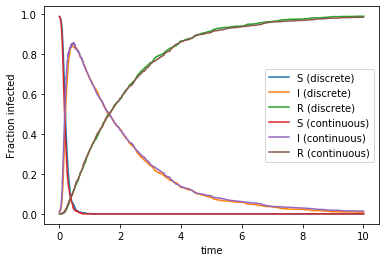

In [13]:
plt.figure()
plt.plot(t1, S1/n, label="S (discrete)")
plt.plot(t1, I1/n, label="I (discrete)")
plt.plot(t1, R1/n, label="R (discrete)")
plt.plot(t, S2/n, label="S (continuous)")
plt.plot(t, I2/n, label="I (continuous)")
plt.plot(t, R2/n, label="R (continuous)")
plt.legend()
plt.xlabel('time')
plt.ylabel('Fraction infected')
plt.show()

## Run an SIS simulation on hypergraphs
* First simulation is is with discrete time steps (DTMC)
* Second simulation is the Gillespie algorithm (CTMC)

In [20]:
t1, S1, I1 = simulation.discrete_SIS(G, tau, gamma, tmin=0, tmax=10, dt=0.1, initial_infecteds = range(initial_size))
t, S2, I2 = simulation.Gillespie_SIS(G, tau, gamma, tmin=0, tmax = 10, initial_infecteds = range(initial_size))

### Plot the results

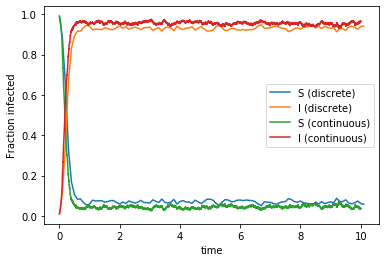

In [21]:
plt.figure()
plt.plot(t1, S1/n, label="S (discrete)")
plt.plot(t1, I1/n, label="I (discrete)")
plt.plot(t, S2/n, label="S (continuous)")
plt.plot(t, I2/n, label="I (continuous)")
plt.legend()
plt.xlabel('time')
plt.ylabel('Fraction infected')
plt.show()


# Opinion Models
* Discrete state, random update (Voter model)
* Discrete state, deterministic update (Majority rule)
* Continuous state, random update (Deffuant-Weisbuch model)
* Continuous state, deterministic update (Hegelmann-Krause)

### Import Opinion Model Library

In [22]:
import opinion_simulation
import random

## Voter Model
* Binary opinion: For/Against or Yes/No
* Randomly choose a hyperedge and if a majority of neighbors believe the opposite, then you change your mind 

### Run simulation

In [45]:
yesAndNo = [random.choice(["Yes", "No"]) for i in range(n)]
yesAndNo = np.array(yesAndNo, dtype=object)
t, statesVM = opinion_simulation.random_node_and_group_sim_discrete_state(G, yesAndNo, tmin=0, tmax=10000)

### Plot Results

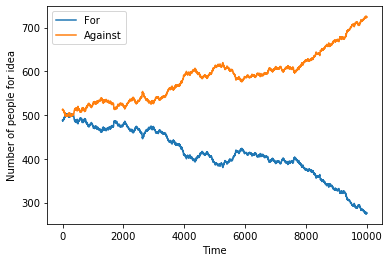

In [46]:
yesArray = np.count_nonzero(statesVM == "Yes", axis=0)
noArray = np.count_nonzero(statesVM == "No", axis=0)
plt.figure()
plt.plot(t, yesArray, label="For")
plt.plot(t, noArray, label="Against")
plt.xlabel("Time")
plt.ylabel("Number of people for idea")
plt.legend()
plt.show()

## Deffuant-Weisbuch

$\epsilon$ is a "cautiousness" parameter

In [48]:
epsilon=0.3

### Run Simulation

In [55]:
initial_states = np.random.uniform(low=-1.0, high=1.0, size=n)
t, statesDW = opinion_simulation.random_group_sim_continuous_state_1D(G, initial_states, tmin = 0, tmax=10000, epsilon=epsilon)

### Plot Results

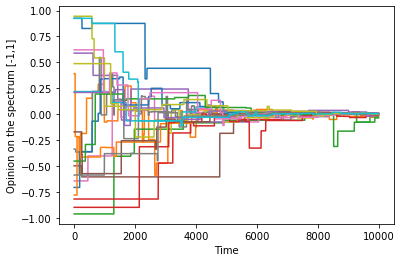

In [56]:
plt.figure()
plt.plot(t, statesDW[::50,:].T)
plt.xlabel("Time")
plt.ylabel("Opinion on the spectrum [-1,1]")
plt.show()

## Hegselmann-Krause

### Run Simulation

In [51]:
initial_states = np.random.uniform(low=-1.0, high=1.0, size=n)
t, statesHK = opinion_simulation.synchronous_update_continuous_state_1D(G, initial_states, tmin=0, tmax=20)

### Plot Results

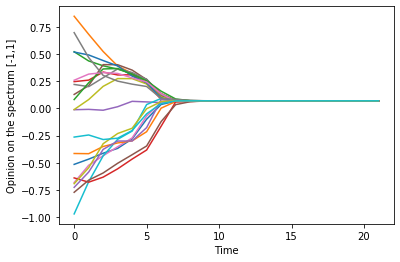

In [53]:
plt.figure()
plt.plot(t, statesHK[::50,:].T)
plt.xlabel("Time")
plt.ylabel("Opinion on the spectrum [-1,1]")
plt.show()